# NCAR CESM output

Community Earth System Model (Community Atmosphere Model - CAM https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1002/2013MS000279) output: https://www.earthsystemgrid.org/; CESM1 CAM5 BGC Large Ensemble Atmosphere Post Processed Data, Monthly Averages

In [2]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np

from salishsea_tools import (
    nc_tools,
    viz_tools,
)
import datetime
from mpl_toolkits.basemap import Basemap, cm
import cmocean
import matplotlib

%matplotlib inline

/ocean/brogalla/GEOTRACES/analysis-birgit/cmocean-master/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [26]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
print('Run id: ucar.cgd.ccsm4.CESM_CAM5_BGC_LE')

Run id: ucar.cgd.ccsm4.CESM_CAM5_BGC_LE


In [4]:
file1 = '/ocean/brogalla/GEOTRACES/data/NCAR/b.e11.B20TRC5CNBDRD.f09_g16.001.cam.h0.dst_a3DDF.185001-200512.nc'
file2 = '/ocean/brogalla/GEOTRACES/data/NCAR/b.e11.B20TRC5CNBDRD.f09_g16.001.cam.h0.dst_a3SFWET.185001-200512.nc'
file3 = '/ocean/brogalla/GEOTRACES/data/NCAR/b.e11.B1850C5CN.f09_g16.005.pop.h.IRON_FLUX.040001-049912.nc'
DDF = nc.Dataset(file1)
SFWET = nc.Dataset(file2)
Fe_FLUX = nc.Dataset(file3)

In [5]:
DDF_lon  = DDF.variables['lon']
DDF_lat  = DDF.variables['lat']
DDF_date = DDF.variables['date']
dst_DDF = DDF.variables['dst_a3DDF']

In [6]:
dst_DDF

<class 'netCDF4._netCDF4.Variable'>
float32 dst_a3DDF(time, lat, lon)
    units: kg/m2/s
    long_name: dst_a3 dry deposition flux at bottom (grav + turb)
    cell_methods: time: mean
unlimited dimensions: time
current shape = (1872, 192, 288)
filling on, default _FillValue of 9.969209968386869e+36 used

In [7]:
SFWET_lon  = SFWET.variables['lon']
SFWET_lat  = SFWET.variables['lat']
SFWET_date  = SFWET.variables['date']
dst_SFWET = SFWET.variables['dst_a3SFWET']

In [8]:
dst_SFWET

<class 'netCDF4._netCDF4.Variable'>
float32 dst_a3SFWET(time, lat, lon)
    units: kg/m2/s
    long_name: Wet deposition flux at surface
    cell_methods: time: mean
unlimited dimensions: time
current shape = (1872, 192, 288)
filling on, default _FillValue of 9.969209968386869e+36 used

In [9]:
print('Min, max, and average of dst_DDF: ')
print(np.amin(dst_DDF[1870,:,:]))
print(np.amax(dst_DDF[1870,:,:]))
print(np.average(dst_DDF[1870,:,:]))

Min, max, and average of dst_DDF: 
2.00555e-16
4.79561e-08
4.59391e-11


In [10]:
print('Min, max, and average of dst_SFWET: ')
print(np.amin(dst_SFWET[1870,:,:]))
print(np.amax(dst_SFWET[1870,:,:]))
print(np.average(dst_SFWET[1870,:,:]))

Min, max, and average of dst_SFWET: 
-5.20954e-09
0.0
-1.02993e-11


In [11]:
mask = nc.Dataset('/ocean/brogalla/GEOTRACES/data/ANHA12_mask.nc')
tmask = mask.variables['tmask']
tmask = np.array(tmask[0,:,:,:])
mlons = mask.variables['nav_lon']
mlats = mask.variables['nav_lat']
mlons = np.array(mlons)
mlats = np.array(mlats)
cond = (tmask > 0.1) 
Z_masked = np.ma.masked_where(cond, tmask) 

/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3342: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3381: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


Text(0,0.5,'lat')

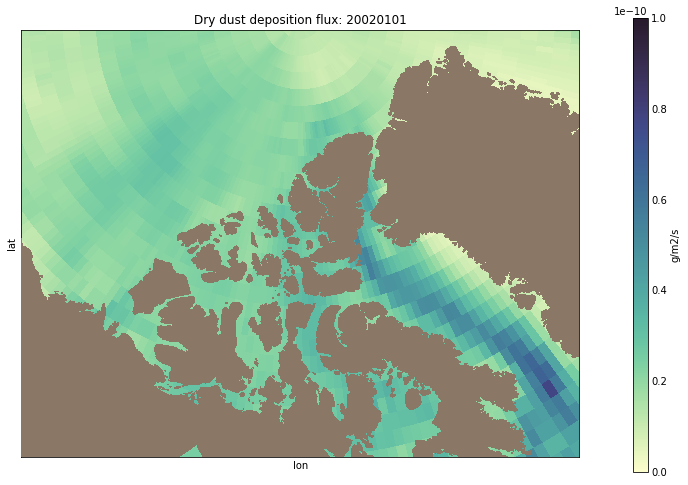

In [12]:
fig, ax1 = plt.subplots(1,1,figsize=(10,9))

proj1=Basemap(projection='eqdc',lat_0 = 77.5, lon_0 = -93, resolution='i', width=3.5e6, height=2.68e6)
x_mask, y_mask = proj1(mlons, mlats)

cmap1 = matplotlib.colors.ListedColormap(["#8b7765"])
proj1.pcolor(x_mask,y_mask,Z_masked[0,:,:], vmin=-1, zorder=3, vmax = 0.3, cmap=cmap1)#cmocean.cm.matter_r)   

dlon, dlat = np.meshgrid(np.array(DDF_lon), np.array(DDF_lat))
x,y = proj1(dlon,dlat)
CS1 = proj1.pcolor(x, y, np.array(dst_DDF[1823,:,:])*10**3, zorder=1, vmin=0, vmax = 1e-10, cmap=cmocean.cm.deep)
cbaxes = fig.add_axes([0.975, 0.15, 0.02, 0.7]) 
CBar = plt.colorbar(CS1, ax=ax1, cax=cbaxes) 
CBar.ax.tick_params(axis='y', length=0)
CBar.ax.set_ylabel('g/m2/s')

ax1.set_title('Dry dust deposition flux: 20020101')
ax1.set_xlabel('lon')
ax1.set_ylabel('lat')

/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3342: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3381: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


Text(0,0.5,'lat')

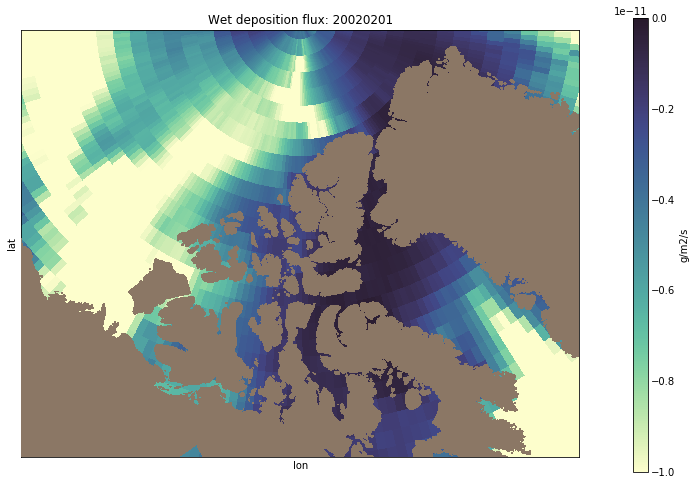

In [15]:
fig, ax1 = plt.subplots(1,1,figsize=(10,9))

proj1 = Basemap(projection='eqdc',lat_0 = 77.5, lon_0 = -93, resolution='i', width=3.5e6, height=2.68e6)
x_mask, y_mask = proj1(mlons, mlats)

cmap1 = matplotlib.colors.ListedColormap(["#8b7765"])
proj1.pcolor(x_mask,y_mask,Z_masked[0,:,:], vmin=-1, zorder=3, vmax = 0.3, cmap=cmap1)#cmocean.cm.matter_r)   

dlon, dlat = np.meshgrid(np.array(SFWET_lon), np.array(SFWET_lat))
x,y = proj1(dlon,dlat)
CS1 = proj1.pcolor(x, y, np.array(dst_SFWET[1823,:,:])*10**3, zorder=1, vmin=-1e-11, vmax = 0, cmap=cmocean.cm.deep)
cbaxes = fig.add_axes([0.975, 0.15, 0.02, 0.7]) 
CBar = plt.colorbar(CS1, ax=ax1, cax=cbaxes) 
CBar.ax.tick_params(axis='y', length=0)
CBar.ax.set_ylabel('g/m2/s')

ax1.set_title('Wet deposition flux: 20020201')
ax1.set_xlabel('lon')
ax1.set_ylabel('lat')

In [17]:
print(np.amax(dplusw))
print(np.amin(dplusw))
print(np.average(dplusw))

3.23468e-05
-8.44544e-07
2.30642e-08


/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3342: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3381: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


Text(0,0.5,'lat')

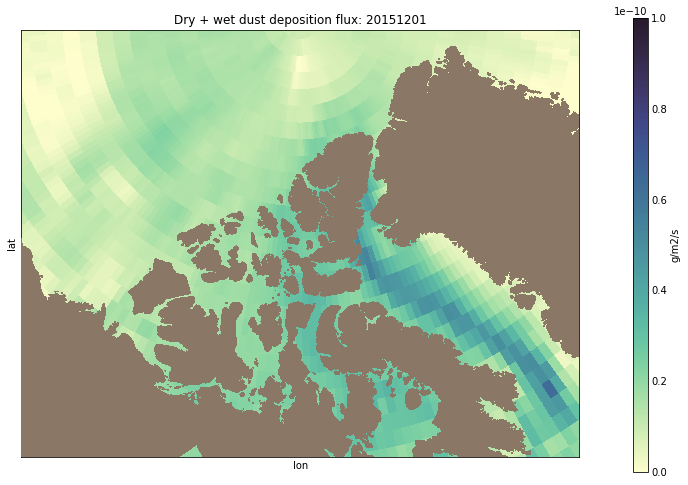

In [16]:
fig, ax1 = plt.subplots(1,1,figsize=(10,9))

proj1=Basemap(projection='eqdc',lat_0 = 77.5, lon_0 = -93, resolution='i', width=3.5e6, height=2.68e6)
x_mask, y_mask = proj1(mlons, mlats)

cmap1 = matplotlib.colors.ListedColormap(["#8b7765"])
proj1.pcolor(x_mask,y_mask,Z_masked[0,:,:], vmin=-1, zorder=3, vmax = 0.3, cmap=cmap1)#cmocean.cm.matter_r)   

dlon, dlat = np.meshgrid(np.array(DDF_lon), np.array(DDF_lat))
x,y = proj1(dlon,dlat)
dplusw = np.add(np.array(dst_DDF[1823,:,:])*10**3,  np.array(dst_SFWET[1823,:,:])*10**3)
CS1 = proj1.pcolor(x, y, dplusw, zorder=1, vmin=0, vmax = 1e-10, cmap=cmocean.cm.deep)
cbaxes = fig.add_axes([0.975, 0.15, 0.02, 0.7]) 
CBar = plt.colorbar(CS1, ax=ax1, cax=cbaxes) 
CBar.ax.tick_params(axis='y', length=0)
CBar.ax.set_ylabel('g/m2/s')

ax1.set_title('Dry + wet dust deposition flux: 20151201')
ax1.set_xlabel('lon')
ax1.set_ylabel('lat')

# Contribution of source regions to mineral dust

Mineral dust consists of entrainment of sediments (it leaves out pollution).

Groot Zwaaftink, C. D., et al. "Substantial contribution of northern high‐latitude sources to mineral dust in the Arctic." Journal of Geophysical Research: Atmospheres 121.22 (2016). https://agupubs.onlinelibrary.wiley.com/doi/epdf/10.1002/2016JD025482

Uses Lagrangian particle dispersion model FLEXPART 2012-2015.

### Dust deposition:

We could use measured mean concentration of Pb from each source region alongside the proportion it contributes to the deposition flux to add the total Pb deposition. Regions for which data are needed (in order of importance):
- North America N60
- Eurasia N60
- Asia S60
- Africa 

<img src="files/dust_deposton.png">

### Dust load:

<img src="files/dust_source.png">

### Surface concentration:

<img src="files/dust_source_surface.png">

# Contribution of source regions to pollution

Hirdman, David Arne, et al. "Source identification of short-lived air pollutants in the Arctic using statistical analysis of measurement data and particle dispersion model output." (2010).

### Processes contributing to pollution (in this case of black carbon):

Stohl, Andreas, et al. "Black carbon in the Arctic: the underestimated role of gas flaring and residential combustion emissions." Atmospheric Chemistry and Physics 13.17 (2013): 8833-8855.

<img src="files/arctc_haze.png">

### Map of anthropogenic and naturally derived dust:

Fan, Song‐Miao. "Modeling of observed mineral dust aerosols in the arctic and the impact on winter season low‐level clouds." Journal of Geophysical Research: Atmospheres 118.19 (2013): 11-161. https://agupubs.onlinelibrary.wiley.com/doi/epdf/10.1002/jgrd.50842

<img src="files/anthro_dust.png">